In [1]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
localfilenamefromplot = 'chirp.png'

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
 
y = [2,4,6,8,10,12,14,16,18,20]
x = np.arange(10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
plt.title('Legend inside')
ax.legend()
#plt.show()
 
fig.savefig(localfilenamefromplot)

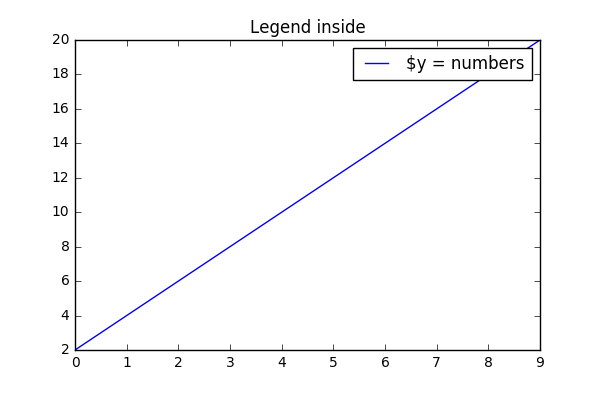

In [5]:
from IPython.display import Image
Image(localfilenamefromplot)

In [6]:
import requests,json

In [7]:
# The code was removed by DSX for sharing.

In [8]:
def put_file(credentials, local_file_name,outputfilename):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""
    f = open(local_file_name,'r')
    my_data = f.read()
    data_to_send = my_data
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    #print(resp1_body)
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/',  outputfilename])
                            print(url2)
    s_subject_token = resp1.headers['x-subject-token']
    #print(s_subject_token)
    #print(credentials['container'])
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = data_to_send)
    print(resp2)

In [9]:
file_to_write_to_os = "chirptowriteos.png"

In [10]:
put_file(oscredential,localfilenamefromplot,file_to_write_to_os)

In [11]:
from io import StringIO

In [12]:
# The code was removed by DSX for sharing.

In [13]:
filetoreadfromos = file_to_write_to_os

In [14]:
filereadfromos = 'chirpreadfromos.png'

In [15]:
r = get_object_storage_file('testObjectStorage',oscredential,filetoreadfromos)

In [16]:
with open(filereadfromos, 'wb') as file:
    file.write(r.content)

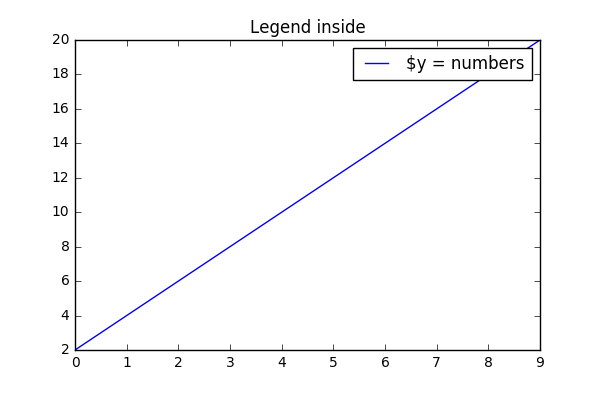

In [17]:
from IPython.display import Image
Image(filereadfromos)